<a href="https://colab.research.google.com/github/Louismada29/Car_Purchasing_Linear_Regression_Model/blob/main/Car_Purchasing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import Library

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [97]:
data = pd.read_csv('https://raw.githubusercontent.com/Louismada29/Car_Purchasing_Linear_Regression_Model/main/Dataset_7%20-%20Otomotic.csv')
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [99]:
data.shape

(500, 9)

# Exploratory Data Analysis

In [100]:
# Number of cases with NaN
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [101]:
Country = data['Country'].unique()
print(Country)

['USA']


**Pada dataset ini, hanya USA sebagai negara yang terdapat dalam kolom "Country"**

In [102]:
df = data.drop(['Customer Name','Customer e-mail','Country'], axis=1)
df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
Age,500.0,46.224000,7.990339,20.0,41.000000,46.000000,52.000000,70.0
Annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
Credit Card Debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
Net Worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
Car Purchase Amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


**Mari kita lihat distribusi datanya!**

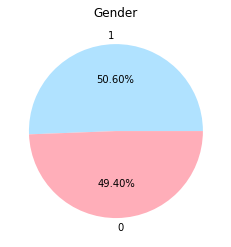

1    253
0    247
Name: Gender, dtype: int64


In [104]:
# Distribution of Gender
# Value 1 : male
# Value 0 : female

gender = df['Gender'].value_counts()
label = gender.index

plt.pie(gender, labels=label, autopct='%.2f%%', colors=['#B0E2FF','#FFAEB9'])
plt.title('Gender')
plt.show()
print(gender)

Berdasarkan gambar distribusi diatas menunjukkan bahwa data distribusi pada kolom "Gender" adalah seimbang

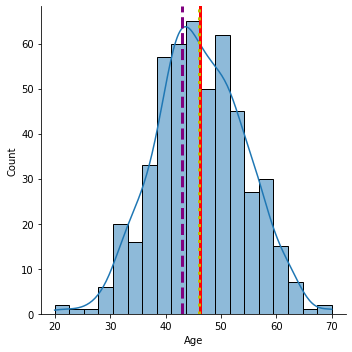

Average :  46.224
Standard deviation :  7.990338855772022
Median :  46.0
Mode :  43


In [105]:
# Distribution of Age
sns.displot(data=df, x='Age', kde =True)

average = df['Age'].mean()
median = df['Age'].median()
mode = df['Age'].mode()
std = df['Age'].std()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()
print('Average : ', average)
print('Standard deviation : ', std)
print('Median : ', median)
print('Mode : ', int(mode))

Berdasarkan gambar distribusi data diatas terlihat bahwa data pada kolom "Age" bisa dikatakan terdistribusi secara normal, hal itu dikarenakan nilai rata-rata sama dengan nilai median.

**Mari lihat korelasi data melalui Heatmap**

Text(0.5, 1.0, 'Correlation Matrix')

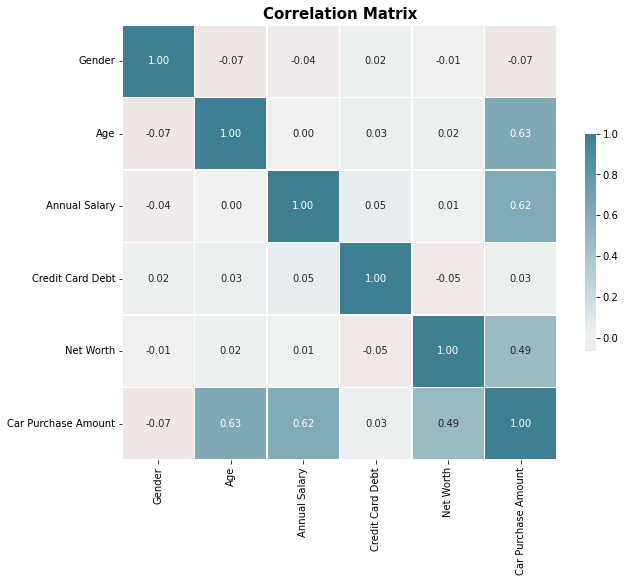

In [106]:
# correlation

corr = df.corr()

plt.figure(figsize=(10,8))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix",size=15, weight='bold')

Berdasarkan Heatmap diatas menunjukkan adanya hubungan (correlation) antara satu variabel independen dengan variabel dependennya. 

Terdapat Hubungan korelasi yang moderat antara "Net Worth" dengan "Car Purchase Amount",

Kemudian pada variabel "Age" dan "Annual Salary" memiliki hubungan korelasi yang sedang dengan variabel dependennya, yaitu "Car Purchase Amount"

# Regression Model

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

X = df[['Gender','Age','Annual Salary','Credit Card Debt','Net Worth']]

y = df['Car Purchase Amount']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 12)

In [108]:
# Call model
linreg = LinearRegression().fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)

[7.82890037e+00 8.39411542e+02 5.61280781e-01 6.20316888e-03
 2.89561196e-02]
-42021.45153379724


In [109]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [110]:
print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

print("MSE Training : ", mean_squared_error(y_train,y_train_pred))
print("MSE Testing : ", mean_squared_error(y_test,y_test_pred))

MAE Training :  209.7841809521243
MAE Testing :  197.34015529704385
MSE Training :  59248.646048996976
MSE Testing :  52611.08806381495


Model Analisa diatas adalah model untuk Multiple Independent Variables, berikut merupakan analisa dengan menggunakan Single Independent Variable hanya untuk kolom yang memiliki hubungan korelasi moderat dan sedang (Age, Net Worth, dan Annual Salary)

In [111]:
# Linear Regression Age VS Car Purchase Amount

X = df[['Age']]
y = df['Car Purchase Amount']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 12)

# Call model
linreg = LinearRegression().fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)

[808.41071871]
7108.946056603068


Rumus Persamaan Regresi Linear yang diperoleh adalah

**Y = 7108.9460 + 808.4107X**

In [112]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

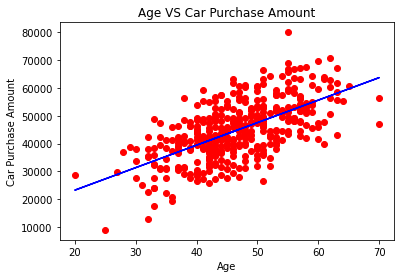

In [113]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_train_pred, color = 'blue')
plt.title('Age VS Car Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.show()

In [114]:
# Linear Regression Net Worth VS Car Purchase Amount

X = df[['Net Worth']]
y = df['Car Purchase Amount']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 12)

# Call model
linreg = LinearRegression().fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)

[0.02883569]
32172.72552725882


Rumus Persamaan Regresi Linear yang diperoleh adalah

**Y = 32172.7255 + 0.0288X**

In [115]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

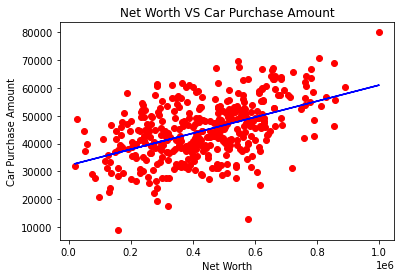

In [116]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_train_pred, color = 'blue')
plt.title('Net Worth VS Car Purchase Amount')
plt.xlabel('Net Worth')
plt.ylabel('Car Purchase Amount')
plt.show()

In [117]:
# Linear Regression Net Worth VS Car Purchase Amount

X = df[['Annual Salary']]
y = df['Car Purchase Amount']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 12)

# Call model
linreg = LinearRegression().fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)

[0.5293683]
11706.512133170625


Rumus Persamaan Regresi Linear yang diperoleh adalah

**Y = 11706.5121 + 0.5293X**

In [118]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

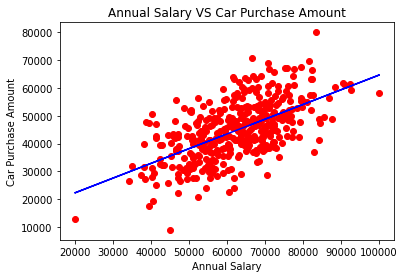

In [119]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_train_pred, color = 'blue')
plt.title('Annual Salary VS Car Purchase Amount')
plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')
plt.show()

Tak berhenti dari situ mari kita lakukan analisa dengan model regresi lainnya seperti:


*   Lasso Regression
*   Ridge Regression
*   Decision tree
*   Random Forest





In [120]:
X = df[['Gender','Age','Annual Salary','Credit Card Debt','Net Worth']]

y = df['Car Purchase Amount']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 12)

## Lasso Regression

In [121]:
from sklearn.linear_model import Lasso

lasso_model = Lasso().fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

In [122]:
print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

print("MSE Training : ", mean_squared_error(y_train,y_train_pred))
print("MSE Testing : ", mean_squared_error(y_test,y_test_pred))

MAE Training :  209.75170641620477
MAE Testing :  197.73277922410063
MSE Training :  59252.71169048387
MSE Testing :  52794.91976228719


## Ridge Regression

In [123]:
from sklearn.linear_model import Ridge

ridge_model = Ridge().fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

print("MSE Training : ", mean_squared_error(y_train,y_train_pred))
print("MSE Testing : ", mean_squared_error(y_test,y_test_pred))

MAE Training :  209.79168357912633
MAE Testing :  197.36266381799035
MSE Training :  59248.71666842932
MSE Testing :  52624.39066416058


## Decision Tree

In [124]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor().fit(X_train, y_train)

y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

print("MSE Training : ", mean_squared_error(y_train,y_train_pred))
print("MSE Testing : ", mean_squared_error(y_test,y_test_pred))

MAE Training :  0.0
MAE Testing :  2942.5399299
MSE Training :  0.0
MSE Testing :  14197738.358061997


## Random Forest Regression

In [125]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor().fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

print("MSE Training : ", mean_squared_error(y_train,y_train_pred))
print("MSE Testing : ", mean_squared_error(y_test,y_test_pred))

MAE Training :  657.2683873369975
MAE Testing :  1725.4959760369984
MSE Training :  1060707.293322922
MSE Testing :  6813217.774822979
